In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = np.load('./300_2020.npy')

In [7]:
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
trend = data[:, 5]

In [9]:
# 1. 统计分析 - 计算均值、中位数、标准差
open_mean = np.mean(open_prices)
close_mean = np.mean(close_prices)
high_mean = np.mean(high_prices)
low_mean = np.mean(low_prices)
volume_mean = np.mean(volume)

open_median = np.median(open_prices)
close_median = np.median(close_prices)
high_median = np.median(high_prices)
low_median = np.median(low_prices)
volume_median = np.median(volume)

open_std = np.std(open_prices)
close_std = np.std(close_prices)
high_std = np.std(high_prices)
low_std = np.std(low_prices)
volume_std = np.std(volume)

# 统计结果整理成 DataFrame
detailed_statistics = {
    "Metric": ["开盘价", "收盘价", "最高价", "最低价", "成交量"],
    "均值": [open_mean, close_mean, high_mean, low_mean, volume_mean],
    "中位数": [open_median, close_median, high_median, low_median, volume_median],
    "标准差": [open_std, close_std, high_std, low_std, volume_std],
}

detailed_statistics_df = pd.DataFrame(detailed_statistics)
print(detailed_statistics_df)

  Metric             均值           中位数            标准差
0    开盘价    4426.977095    4583.51990     493.215566
1    收盘价    4427.025544    4583.55030     493.216300
2    最高价    4428.051231    4584.66870     493.381975
3    最低价    4425.935973    4582.08595     493.040892
4    成交量  652119.924617  504496.50000  555812.637456


In [11]:
open_close_diff = open_prices - close_prices  # 开盘价与收盘价的差值
high_low_diff = high_prices - low_prices      # 最高价与最低价的差值

# 差值统计分析
open_close_mean = np.mean(open_close_diff)
high_low_mean = np.mean(high_low_diff)
open_close_median = np.median(open_close_diff)
high_low_median = np.median(high_low_diff)

# 差值结果整理成DataFrame
diff_statistics = {
    "Metric": ["Open-Close Difference", "High-Low Difference"],
    "Mean": [open_close_mean, high_low_mean],
    "Median": [open_close_median, high_low_median],
}
diff_statistics_df = pd.DataFrame(diff_statistics)
print(diff_statistics_df)

                  Metric      Mean   Median
0  Open-Close Difference -0.048449 -0.05540
1    High-Low Difference  2.115258  1.51105


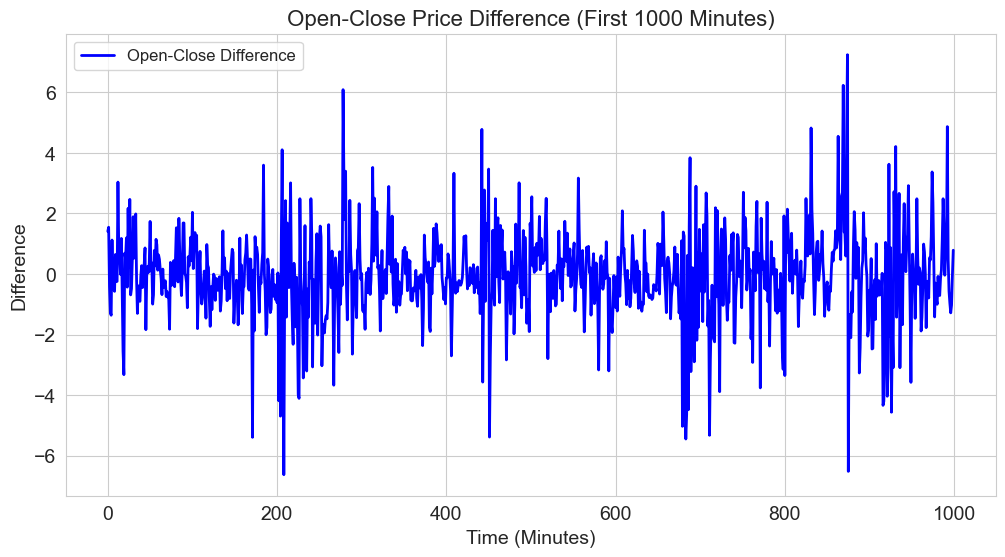

In [14]:
plt.rcParams.update({'font.size': 14})

# 3.1 开盘价和收盘价的差值趋势
plt.figure(figsize=(12, 6))
plt.plot(open_close_diff[:1000], label='Open-Close Difference', color='blue', linewidth=2)
plt.title('Open-Close Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

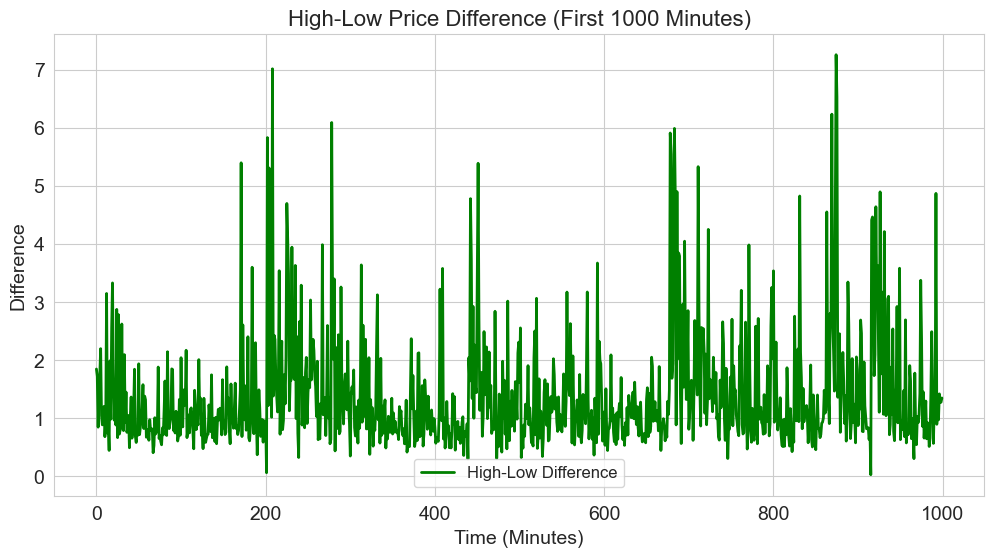

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.title('High-Low Price Difference (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


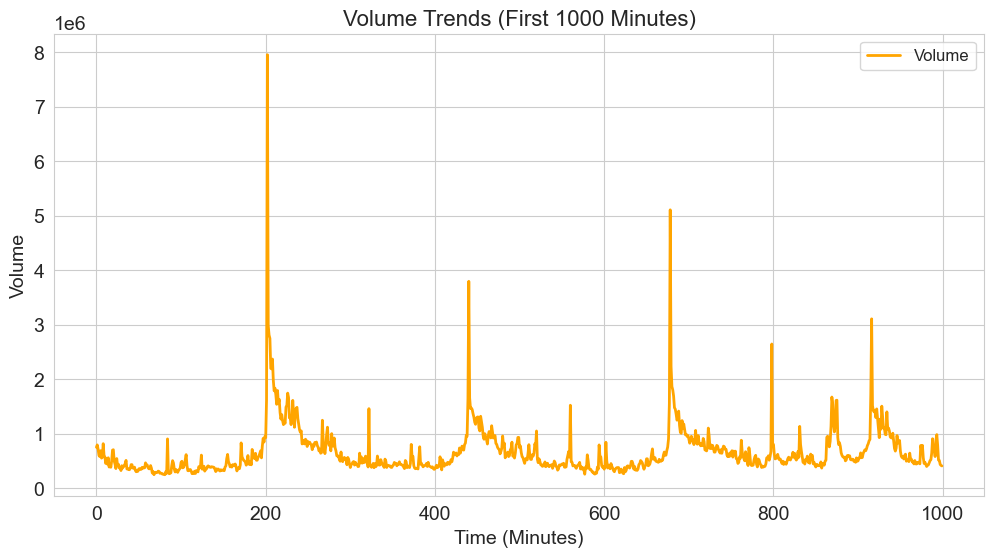

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(volume[:1000], label='Volume', color='orange', linewidth=2)
plt.title('Volume Trends (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


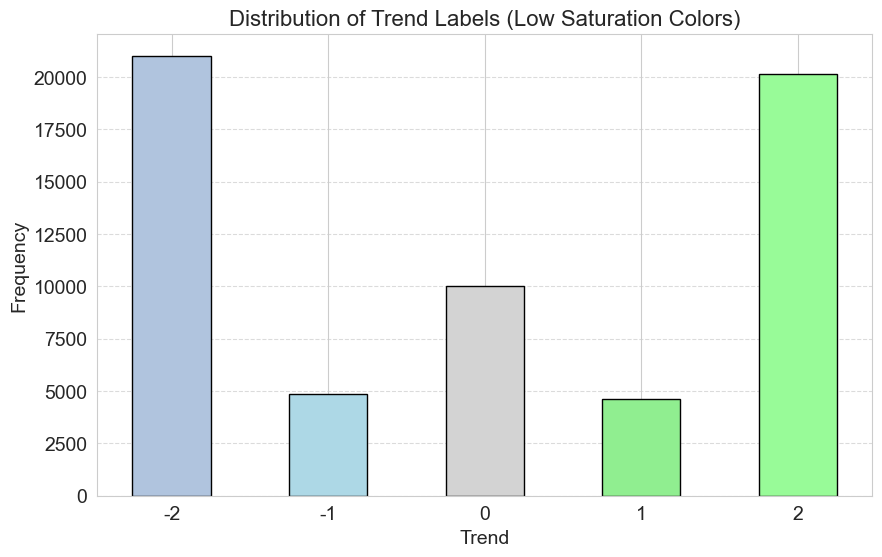

In [22]:
labels = ['-2', '-1', '0', '1', '2']
trend_counts = [np.sum(trend == -2), np.sum(trend == -1), np.sum(trend == 0), np.sum(trend == 1), np.sum(trend == 2)]

plt.figure(figsize=(10, 6))
plt.bar(
    [-2, -1, 0, 1, 2], 
    trend_counts, 
    tick_label=labels, 
    edgecolor='black', 
    color=['#b0c4de', '#add8e6', '#d3d3d3', '#90ee90', '#98fb98'], 
    width=0.5
)
plt.title('Distribution of Trend Labels (Low Saturation Colors)', fontsize=16)
plt.xlabel('Trend', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# 3.5 涨跌趋势随时间变化
sampling_interval = 10
trend_300 = trend[:, 5]
sampled_trend = trend_300[:1000:sampling_interval]
sampled_time = np.arange(0, 1000, sampling_interval)

# 使用移动平均平滑曲线
window_size = 5
smoothed_trend = np.convolve(sampled_trend, np.ones(window_size)/window_size, mode='valid')
smoothed_time = sampled_time[:len(smoothed_trend)]

# 绘制采样数据和平滑曲线
plt.figure(figsize=(12, 6))
plt.plot(sampled_time, sampled_trend, label='Sampled Trend', color='purple', linewidth=1, alpha=0.6, linestyle='--')
plt.plot(smoothed_time, smoothed_trend, label='Smoothed Trend', color='blue', linewidth=2)
plt.title('Trend Label Changes Over Time (Sampled and Smoothed)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Trend Label', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed